# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest - Classification</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

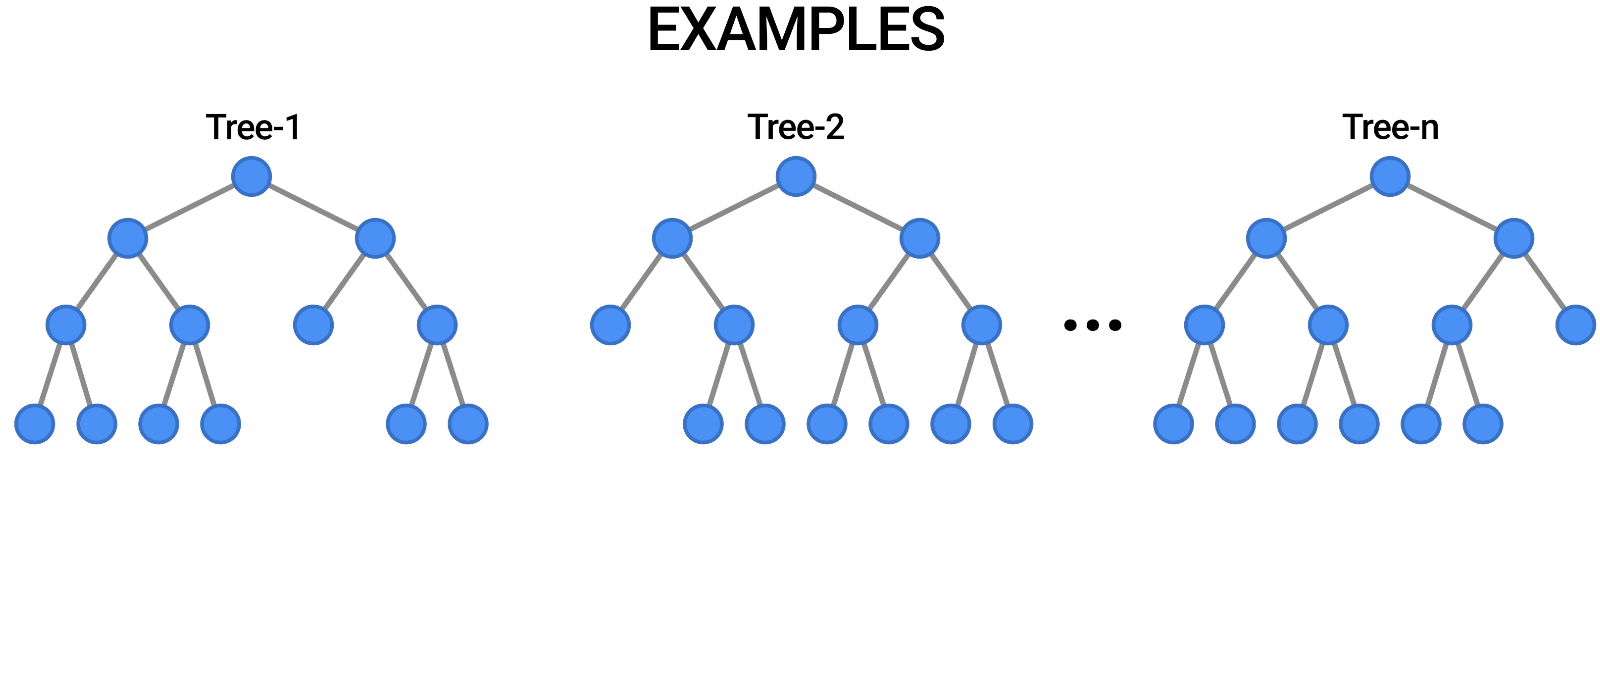

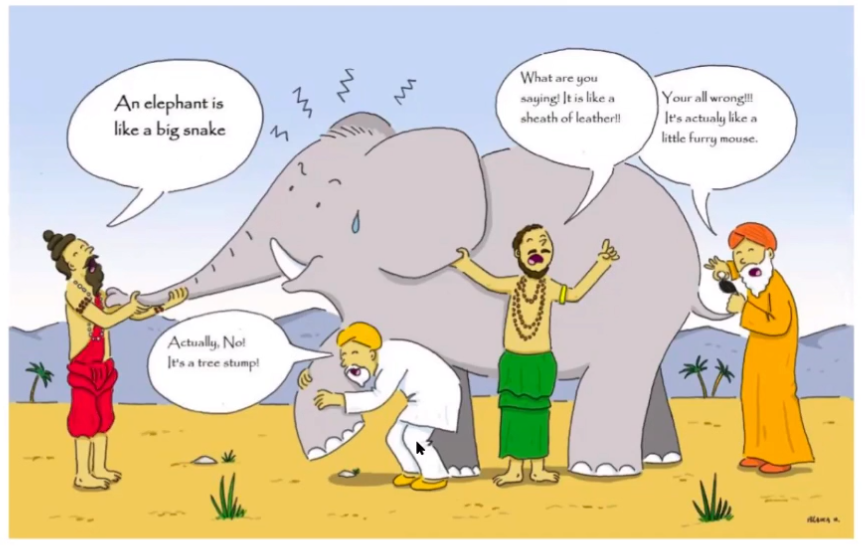

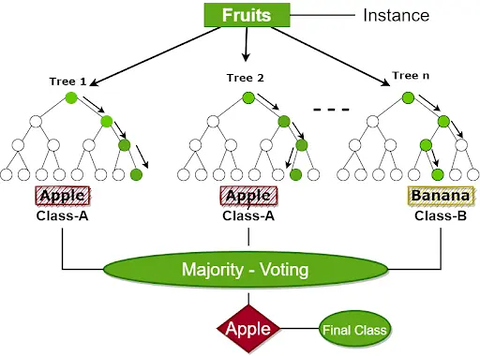

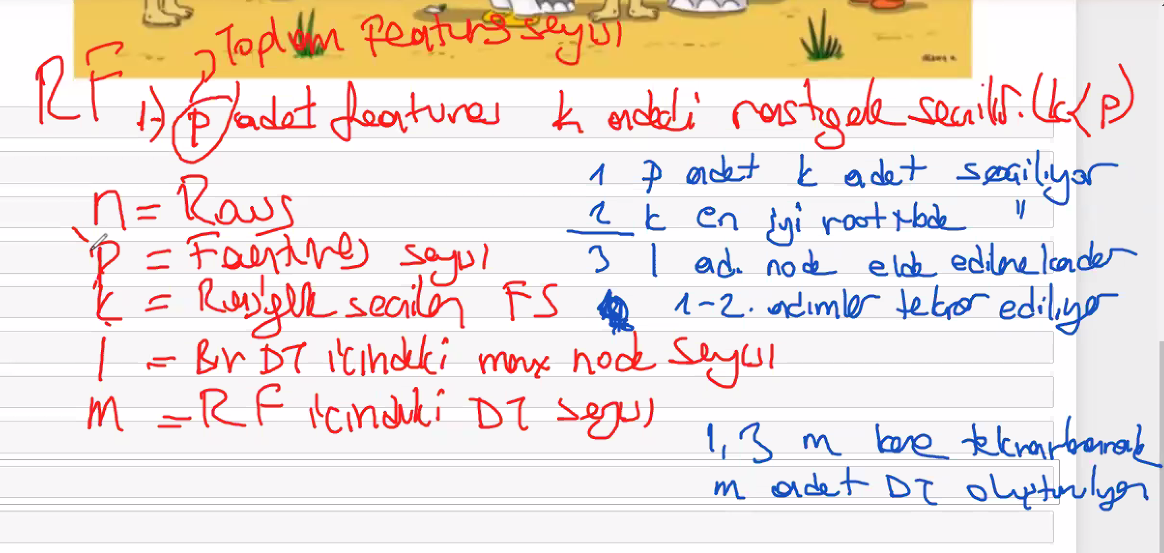

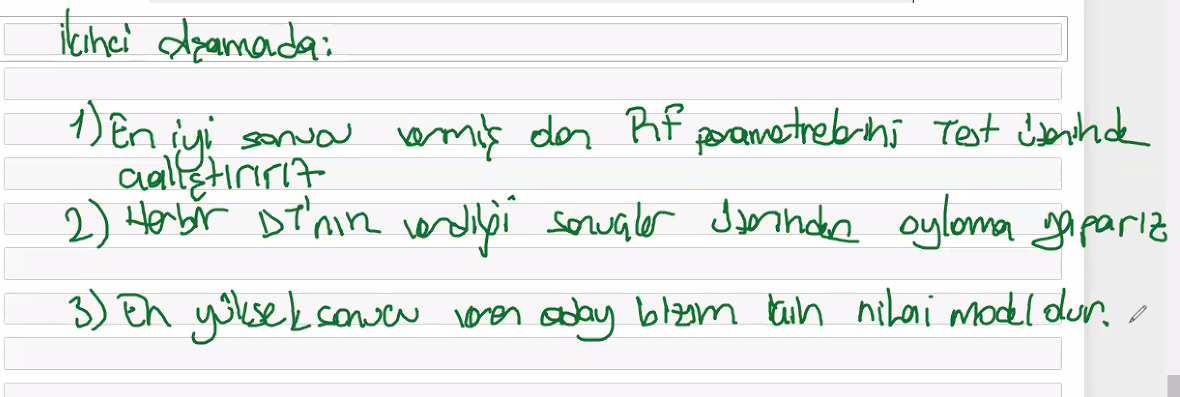

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read dataset

In [2]:
df = pd.read_csv("penguins_size.csv")

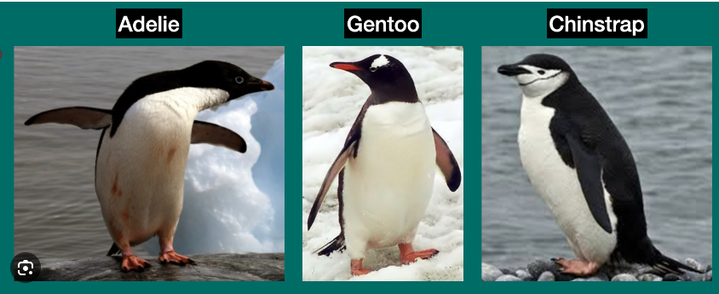

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [6]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [7]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df[df.species=="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.loc[336, "sex"] = "MALE"

In [10]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

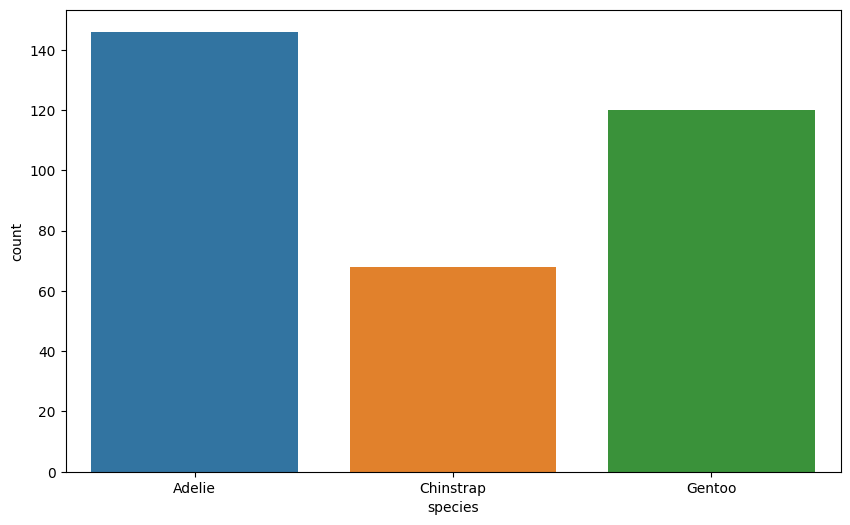

In [11]:
sns.countplot(x = "species", data = df);

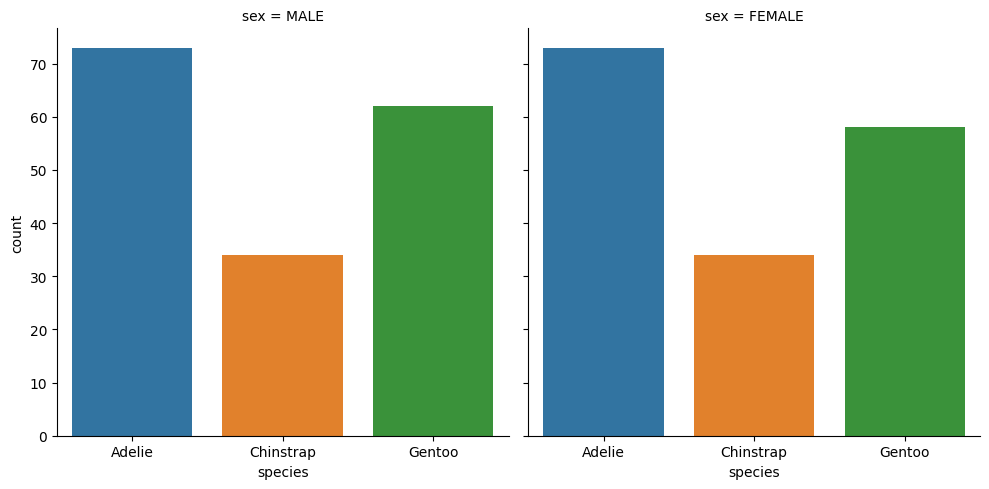

In [12]:
sns.catplot(x = "species", data = df, kind = "count", col = "sex");

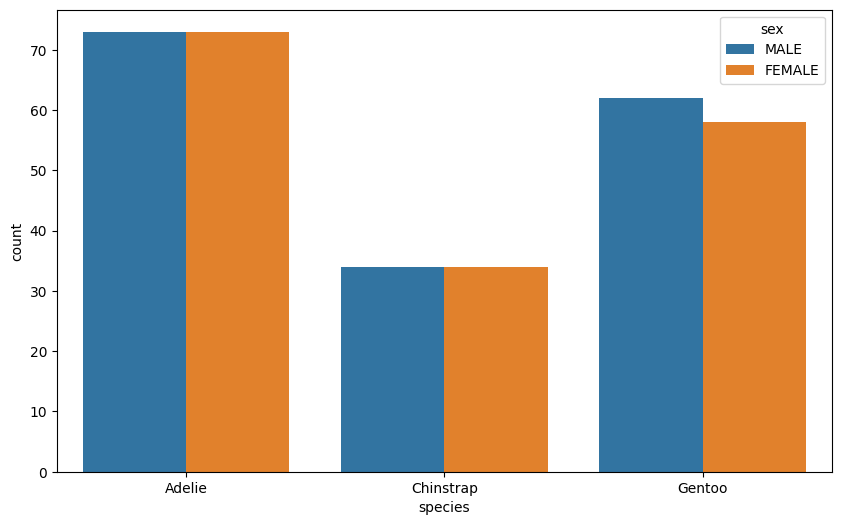

In [13]:
sns.countplot(x="species", data = df, hue = "sex");

<Figure size 1200x600 with 0 Axes>

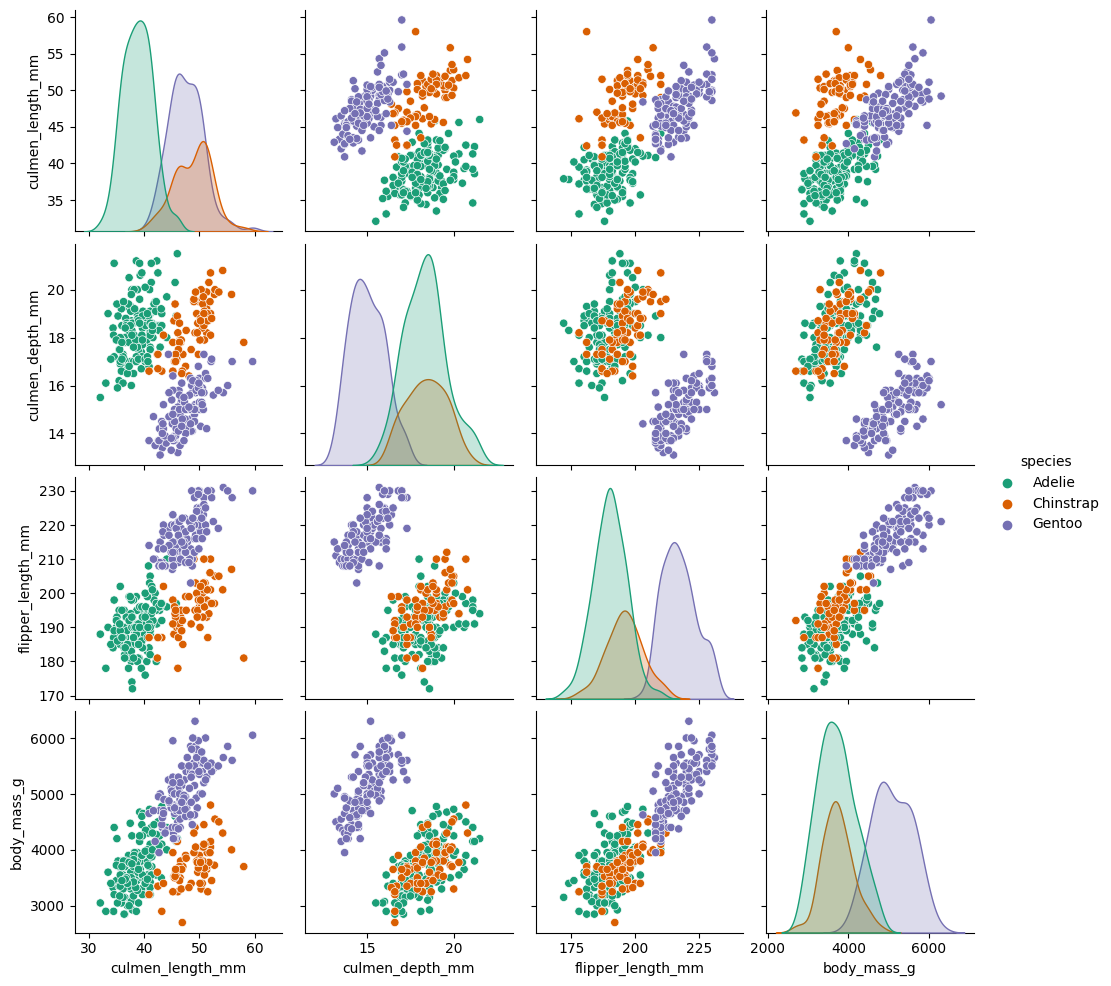

In [14]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2');

In [15]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


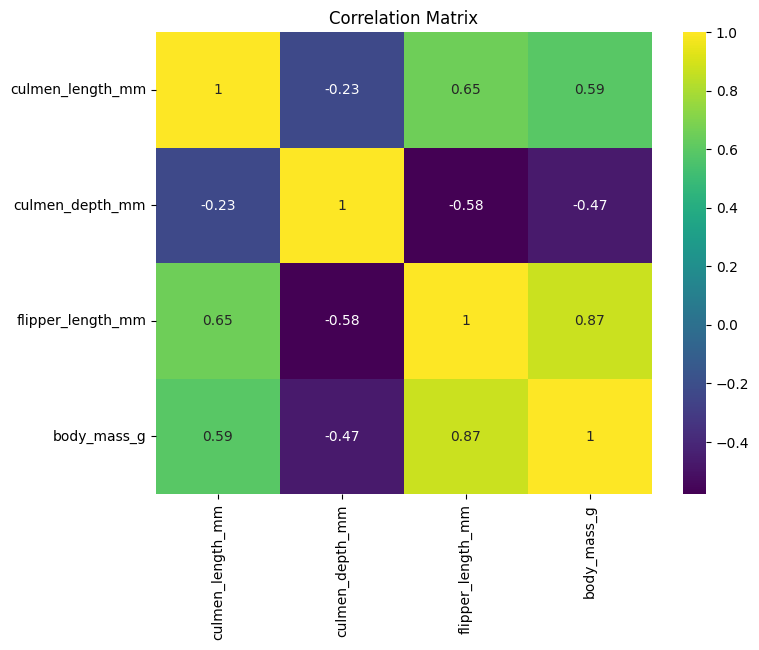

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

**SVM ve KNN de one hot encoding Treelerde label encoding ve ordinal encoding daha uygundur.**

**Linear regression modellerinde**

* **Nominal Değişken:** One Hot Encoding (Dummmies)
* **Ordinal Değişken:** Ordinal-Label Encoding veya map fonksiyonu (belirli bir sıralam varsa daha rahat olur)

**Tree Base Modeller İçin**

* **Nominal ve Ordinal Değişeknler için:** Bu modeller kategorik değişkneler ile başa çıkabilecek kapasiteye sahip oldukları için genellikle Label Encoder yeterli olacaktır. Ancak Birden fazla feature için dönüşüm gerekecekse Ordinal encoder en iyi seçenektir.

**Lojistik Regresyon İçin:**

* **Nominal Değişken:** One Hot Encoding (Dummmies)
* **Ordinal Değişken:** Ordinal-Label Encoding veya map fonksiyonu (belirli bir sıralam varsa daha rahat olur)

**SVM ve KNN İçin**

* **Nominal Değişken:** One Hot Encoding (Dummmies)
* **Ordinal Değişken:** Ordinal-Label Encoding veya map fonksiyonu (belirli bir sıralam varsa daha rahat olur)

**Naive Bayes İçin**

* **Nominal Değişken:** One Hot Encoding (Dummmies)
* **Ordinal Değişken:** Ordinal-Label Encoding veya map fonksiyonu (belirli bir sıralam varsa daha rahat olur)


In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
data = {"animal": ["tiger", "dog", "horse", "lion", "cat"]}     # Egitilen data

In [19]:
predict = {"animal": ["lion", "horse"]}      # Tahminlerin alinacagi data

In [20]:
data = pd.DataFrame(data)
data

,animal
0,tiger
1,dog
2,horse
3,lion
4,cat


In [21]:
predict = pd.DataFrame(predict)
predict

,animal
0,lion
1,horse


In [22]:
encoder = OrdinalEncoder()
encoder.fit_transform(data)

array([[4.],
       [1.],
       [2.],
       [3.],
       [0.]])

In [23]:
encoder.transform(predict)

array([[3.],
       [2.]])

# Train | Test Split

In [24]:
X = df.drop("species", axis = 1)
y = df["species"]

In [25]:
cat = X.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [26]:
X[cat]

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
4,Torgersen,FEMALE
5,Torgersen,MALE
...,...,...
338,Biscoe,FEMALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


In [27]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,39.1,18.7,181.0,3750.0,1.0
1,2.0,39.5,17.4,186.0,3800.0,0.0
2,2.0,40.3,18.0,195.0,3250.0,0.0
4,2.0,36.7,19.3,193.0,3450.0,0.0
5,2.0,39.3,20.6,190.0,3650.0,1.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling and Model Performance

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modeling

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [33]:
dt_model = DecisionTreeClassifier(random_state= 101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



## CV

In [34]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [35]:
model = DecisionTreeClassifier(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.974457
test_precision_micro    0.974457
test_recall_micro       0.974457
test_f1_micro           0.974457
dtype: float64

# DT_model Feature Importances

In [36]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.336093
island,0.084673
body_mass_g,0.028136
sex,0.010853
culmen_depth_mm,0.009044


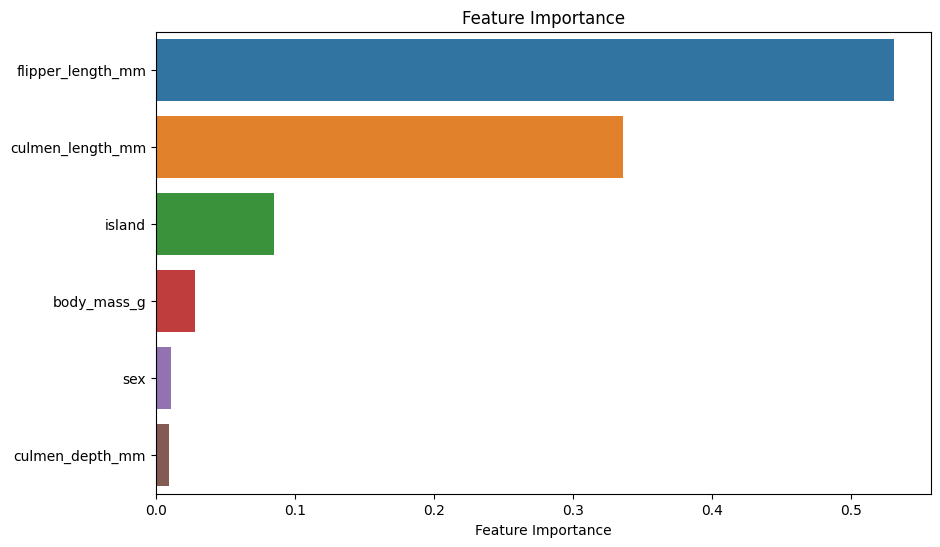

In [37]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

# Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [40]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [41]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.995833
test_precision_micro    0.995833
test_recall_micro       0.995833
test_f1_micro           0.995833
dtype: float64

In [42]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
culmen_length_mm,0.364040
flipper_length_mm,0.228925
body_mass_g,0.152599
culmen_depth_mm,0.142287
island,0.105742
sex,0.006407


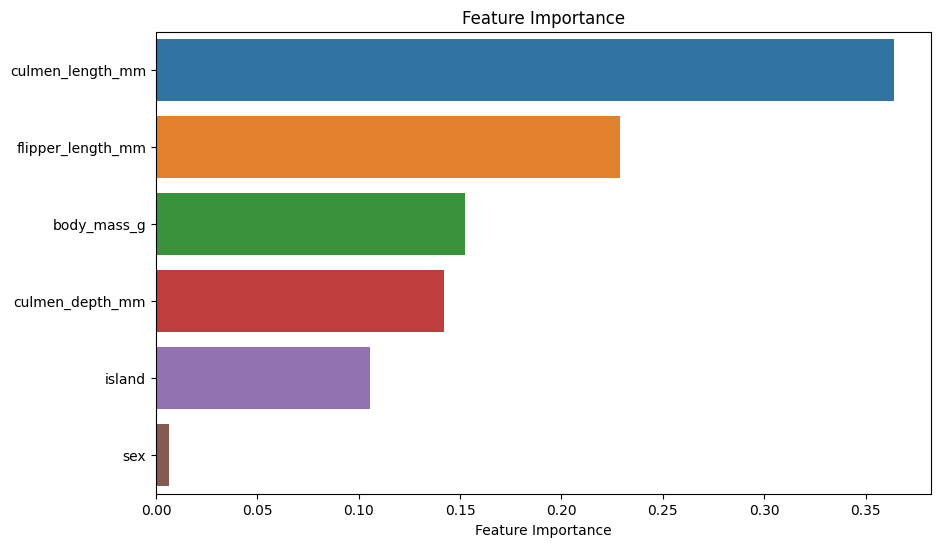

In [43]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [44]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1)

,Feature Importance,Feature Importance
culmen_length_mm,0.364040,0.336093
flipper_length_mm,0.228925,0.531201
body_mass_g,0.152599,0.028136
culmen_depth_mm,0.142287,0.009044
island,0.105742,0.084673
sex,0.006407,0.010853


# Understanding Hyperparameters

In [48]:
from sklearn.tree import plot_tree
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test, model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[19], feature_names=X.columns,
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

In [46]:
purned_tree = RandomForestClassifier(random_state=101)
purned_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=101)



Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



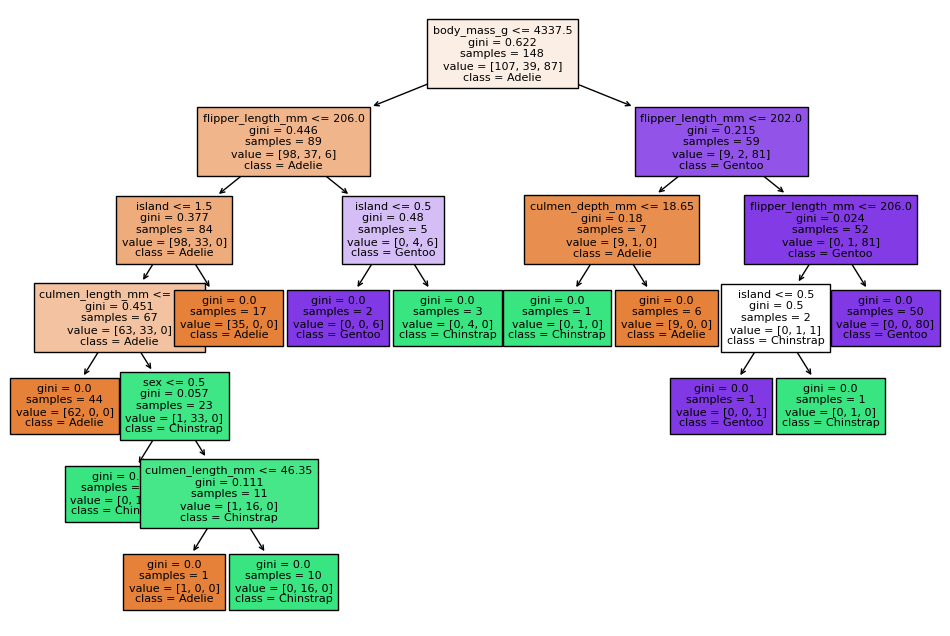

In [49]:
report_model(purned_tree)

# Prediction

In [50]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[35, 48], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[180, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [51]:
obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,180,3000,FEMALE
1,Biscoe,48,20,210,4600,MALE


In [52]:
obs[cat]

,island,sex
0,Torgersen,FEMALE
1,Biscoe,MALE


In [53]:
obs[cat] = enc.transform(obs[cat])

In [54]:
obs[cat] = enc.inverse_transform(obs[cat])

In [55]:
pred = pd.Series(pred).rename("prediction")

NameError: name 'pred' is not defined

In [56]:
pd.concat([obs, pred], axis = 1)

NameError: name 'pred' is not defined

# Visualization

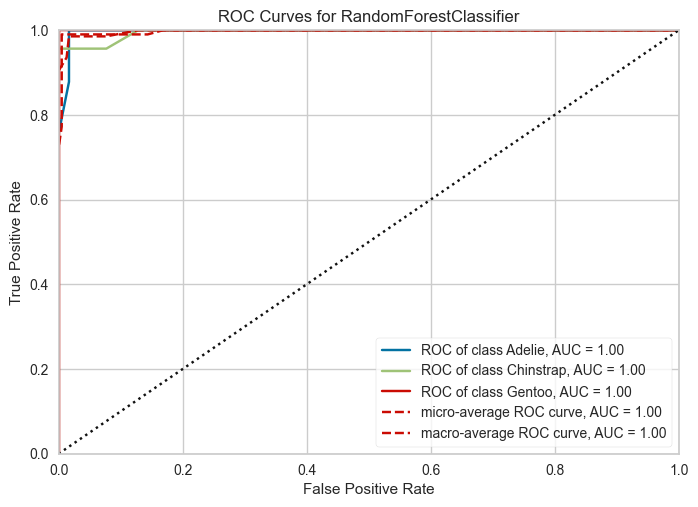

In [57]:
from yellowbrick.classifier import ROCAUC
rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

# DT and RF Scoring for diabetes dataset

In [75]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [78]:
df.shape

(768, 9)

In [79]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [80]:
df.shape

(720, 9)

# Train | Test Split and Scailling

In [81]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=101)

# Modelling  and Model Performance

In [84]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

In [85]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=101)

In [86]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 26]
 [33 29]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       118
           1       0.53      0.47      0.50        62

    accuracy                           0.67       180
   macro avg       0.63      0.62      0.63       180
weighted avg       0.66      0.67      0.67       180


Train_Set
[[355   0]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       185

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



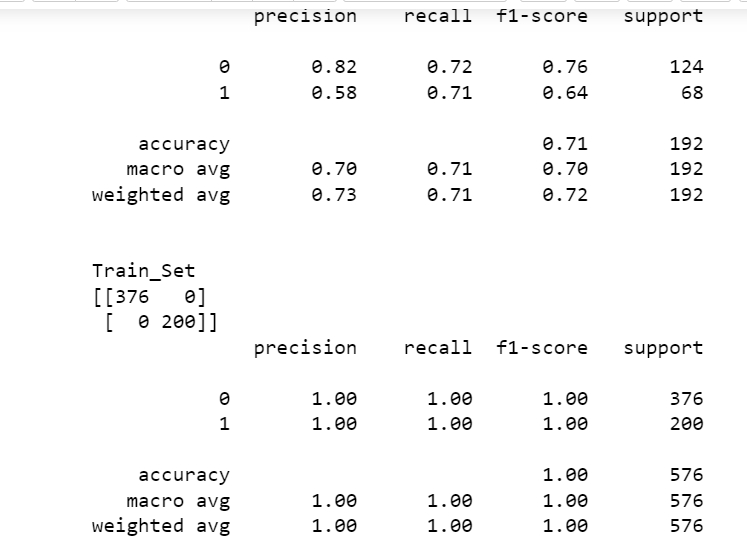

In [87]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.733333
test_precision    0.620580
test_recall       0.595029
test_f1           0.603191
dtype: float64

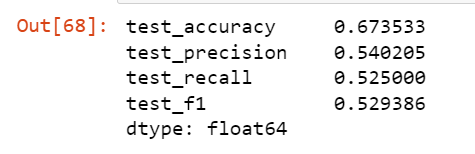

# GridSearch DT

In [88]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [89]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [90]:
dt_grid_model.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'splitter': 'random'}

In [91]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 39]
 [16 46]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       118
           1       0.54      0.74      0.63        62

    accuracy                           0.69       180
   macro avg       0.69      0.71      0.68       180
weighted avg       0.73      0.69      0.70       180


Train_Set
[[242 113]
 [ 33 152]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       355
           1       0.57      0.82      0.68       185

    accuracy                           0.73       540
   macro avg       0.73      0.75      0.72       540
weighted avg       0.78      0.73      0.74       540



# CV DT

In [95]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101,
                 max_depth= 6,
                 max_features= 3,
                 min_samples_leaf= 5,
                 min_samples_split= 15,
                 splitter= 'random')

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.712963
test_precision    0.566151
test_recall       0.710526
test_f1           0.625439
dtype: float64

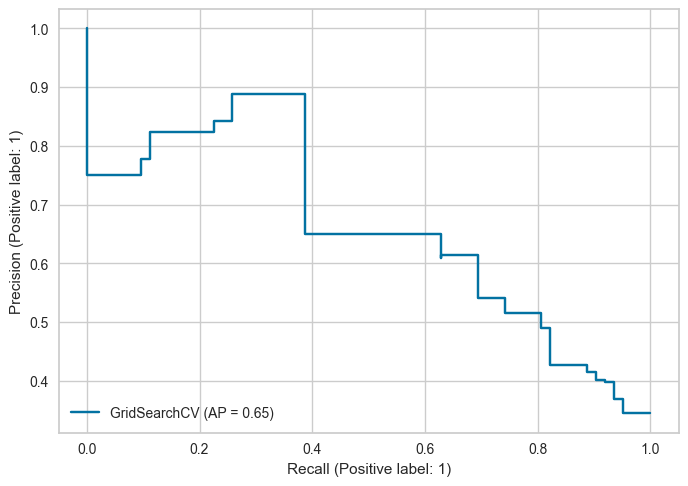

In [96]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

plot_precision_recall_curve(dt_grid_model, X_test, y_test);

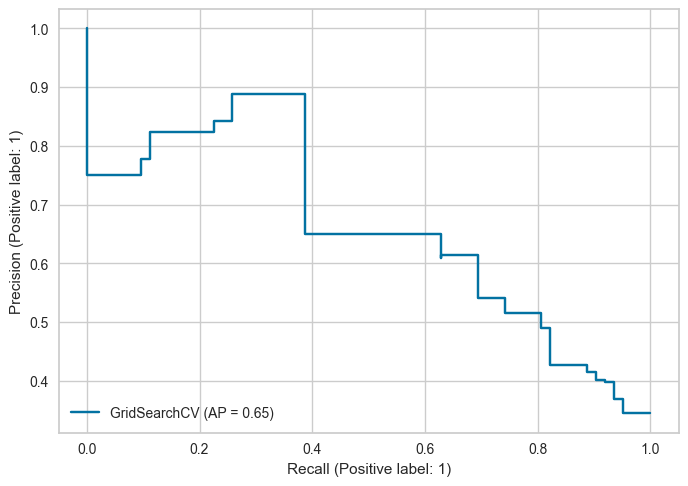

In [97]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test)

# Random Forests

In [98]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

rf_model.fit(X_train, y_train)

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[99 19]
 [31 31]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.62      0.50      0.55        62

    accuracy                           0.72       180
   macro avg       0.69      0.67      0.68       180
weighted avg       0.71      0.72      0.71       180


Train_Set
[[355   0]
 [  0 185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       185

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [99]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.746296
test_precision    0.658836
test_recall       0.574561
test_f1           0.608224
dtype: float64

# GridSearch for RF

In [106]:
param_grid = {'n_estimators':[100, 128, 200, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[1, 2, 3, "auto"],
             'max_depth':[1,2, 3, 5],
             'min_samples_split':[1, 2, 5]}

In [107]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring = "recall",
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [108]:
rf_grid_model.best_params_

{'max_depth': 2,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 128}

In [109]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[88 30]
 [17 45]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       118
           1       0.60      0.73      0.66        62

    accuracy                           0.74       180
   macro avg       0.72      0.74      0.72       180
weighted avg       0.76      0.74      0.74       180


Train_Set
[[280  75]
 [ 29 156]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       355
           1       0.68      0.84      0.75       185

    accuracy                           0.81       540
   macro avg       0.79      0.82      0.80       540
weighted avg       0.83      0.81      0.81       540



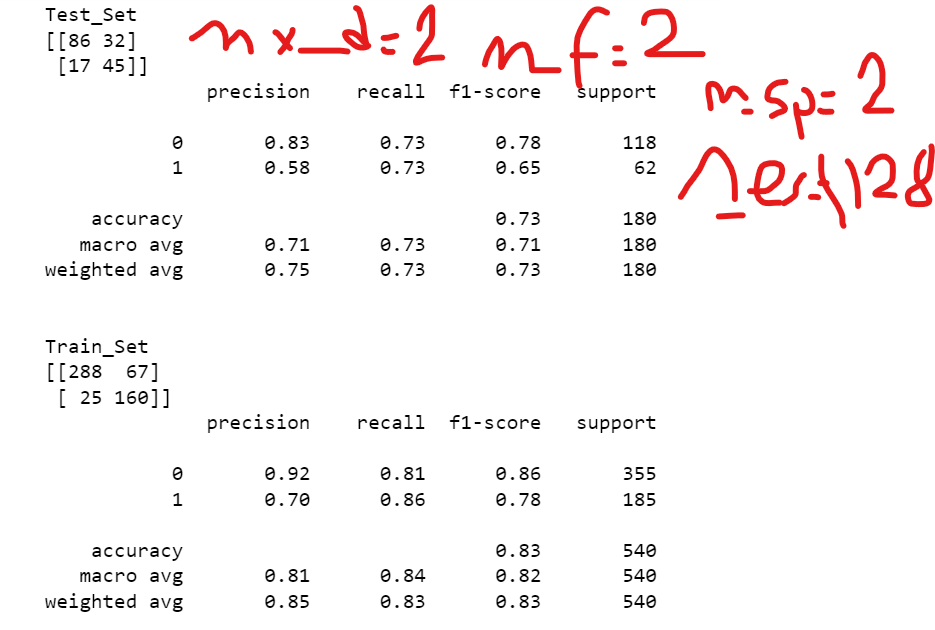

# Precission Recall Curve

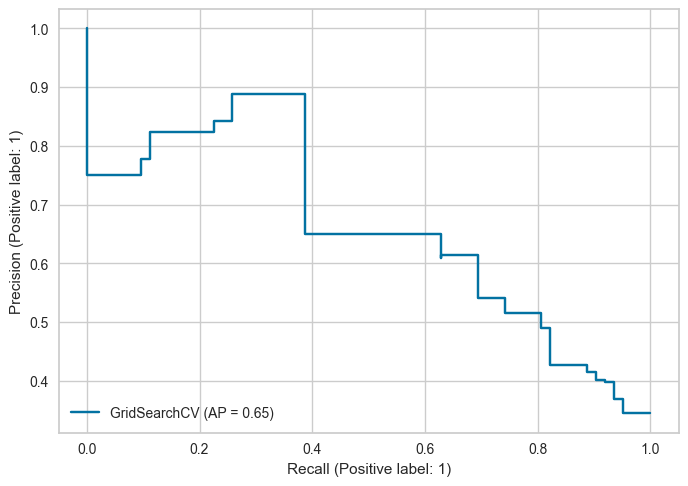

In [110]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test);